In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
imPth = r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 8\cm.jpg'
img = plt.imread(imPth)

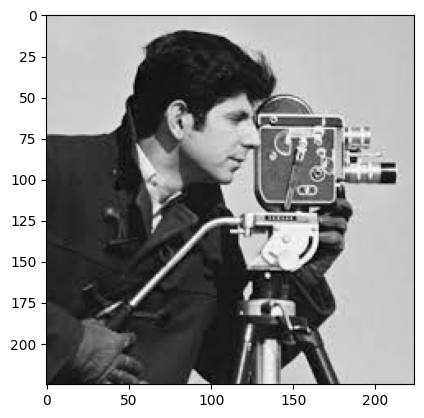

In [3]:
plt.imshow(img)

In [4]:
E = cv2.Canny(img, 150, 250)

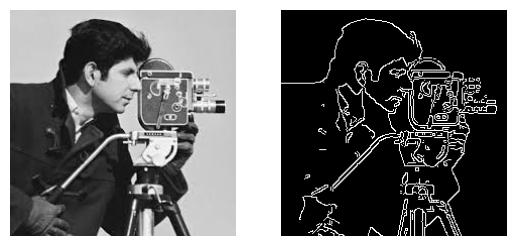

In [5]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(E, cmap='gray')
plt.axis('off')
plt.show()

# Calculating a single Gaussian Value

In [6]:
x = -1
y = 1
sigma = 1

v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/2*sigma**2)
print(v)

0.05854983152431917


# Calculating the whole Gaussian Matrix

In [7]:
def getGaussianFilter(s, sigma):
    # Dimensions of our window
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX

    G = np.zeros((s,s))

    for x in range(minX, maxX+1):
        for y in range(minY, maxY+1):
            v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            G[x-minX, y-minY] = v
    
    return G

In [8]:
G = getGaussianFilter(11,2)
G

array([[7.68103295e-05, 2.36592471e-04, 5.67555834e-04, 1.06033389e-03,
        1.54277671e-03, 1.74819504e-03, 1.54277671e-03, 1.06033389e-03,
        5.67555834e-04, 2.36592471e-04, 7.68103295e-05],
       [2.36592471e-04, 7.28756116e-04, 1.74819504e-03, 3.26605832e-03,
        4.75208682e-03, 5.38481983e-03, 4.75208682e-03, 3.26605832e-03,
        1.74819504e-03, 7.28756116e-04, 2.36592471e-04],
       [5.67555834e-04, 1.74819504e-03, 4.19370190e-03, 7.83486662e-03,
        1.13996637e-02, 1.29175112e-02, 1.13996637e-02, 7.83486662e-03,
        4.19370190e-03, 1.74819504e-03, 5.67555834e-04],
       [1.06033389e-03, 3.26605832e-03, 7.83486662e-03, 1.46374579e-02,
        2.12973755e-02, 2.41330882e-02, 2.12973755e-02, 1.46374579e-02,
        7.83486662e-03, 3.26605832e-03, 1.06033389e-03],
       [1.54277671e-03, 4.75208682e-03, 1.13996637e-02, 2.12973755e-02,
        3.09874986e-02, 3.51134361e-02, 3.09874986e-02, 2.12973755e-02,
        1.13996637e-02, 4.75208682e-03, 1.54277671e-

In [9]:
np.sum(G)

0.9891178756586588

In [10]:
a = cv2.getGaussianKernel(11,2)
G2 = a.dot(a.T)
G2

array([[7.76553851e-05, 2.39195426e-04, 5.73799997e-04, 1.07199952e-03,
        1.55975010e-03, 1.76742842e-03, 1.55975010e-03, 1.07199952e-03,
        5.73799997e-04, 2.39195426e-04, 7.76553851e-05],
       [2.39195426e-04, 7.36773780e-04, 1.76742842e-03, 3.30199100e-03,
        4.80436855e-03, 5.44406279e-03, 4.80436855e-03, 3.30199100e-03,
        1.76742842e-03, 7.36773780e-04, 2.39195426e-04],
       [5.73799997e-04, 1.76742842e-03, 4.23984037e-03, 7.92106463e-03,
        1.15250810e-02, 1.30596277e-02, 1.15250810e-02, 7.92106463e-03,
        4.23984037e-03, 1.76742842e-03, 5.73799997e-04],
       [1.07199952e-03, 3.30199100e-03, 7.92106463e-03, 1.47984970e-02,
        2.15316860e-02, 2.43985967e-02, 2.15316860e-02, 1.47984970e-02,
        7.92106463e-03, 3.30199100e-03, 1.07199952e-03],
       [1.55975010e-03, 4.80436855e-03, 1.15250810e-02, 2.15316860e-02,
        3.13284183e-02, 3.54997488e-02, 3.13284183e-02, 2.15316860e-02,
        1.15250810e-02, 4.80436855e-03, 1.55975010e-

In [11]:
np.sum(G2)

1.0000000000000004

# Smoothing an image with a Gaussian Kernel

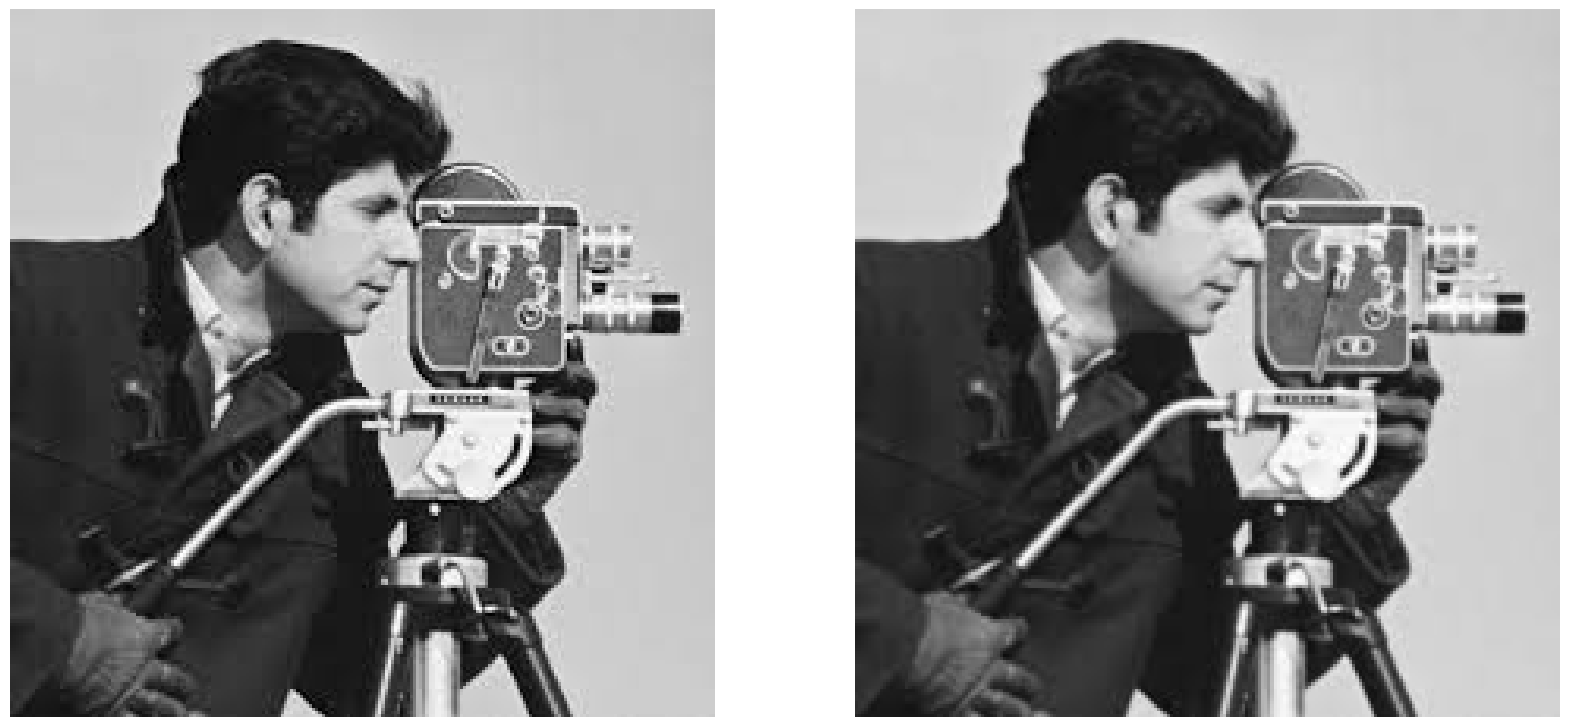

In [12]:
G  = getGaussianFilter(3,0.5)
img_S = cv2.filter2D(img, -1, G)
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_S, cmap='gray')
plt.axis('off')
plt.show()

# Calculating the Gradients X and Y

In [13]:
img_S = img_S[:,:,0]
mask_x = np.zeros((2,1))
mask_x[0] = -1
mask_x[1] = 1

In [14]:
mask_x

array([[-1.],
       [ 1.]])

In [15]:
# First convert the datatype that can handle negative values
img_S = np.float64(img_S)
Ix = cv2.filter2D(img_S, -1 ,mask_x)
mask_y = mask_x.T
Iy = cv2.filter2D(img_S, -1, mask_y)

In [16]:
Iy.shape

(225, 224)

In [17]:
img_S.shape

(225, 224)

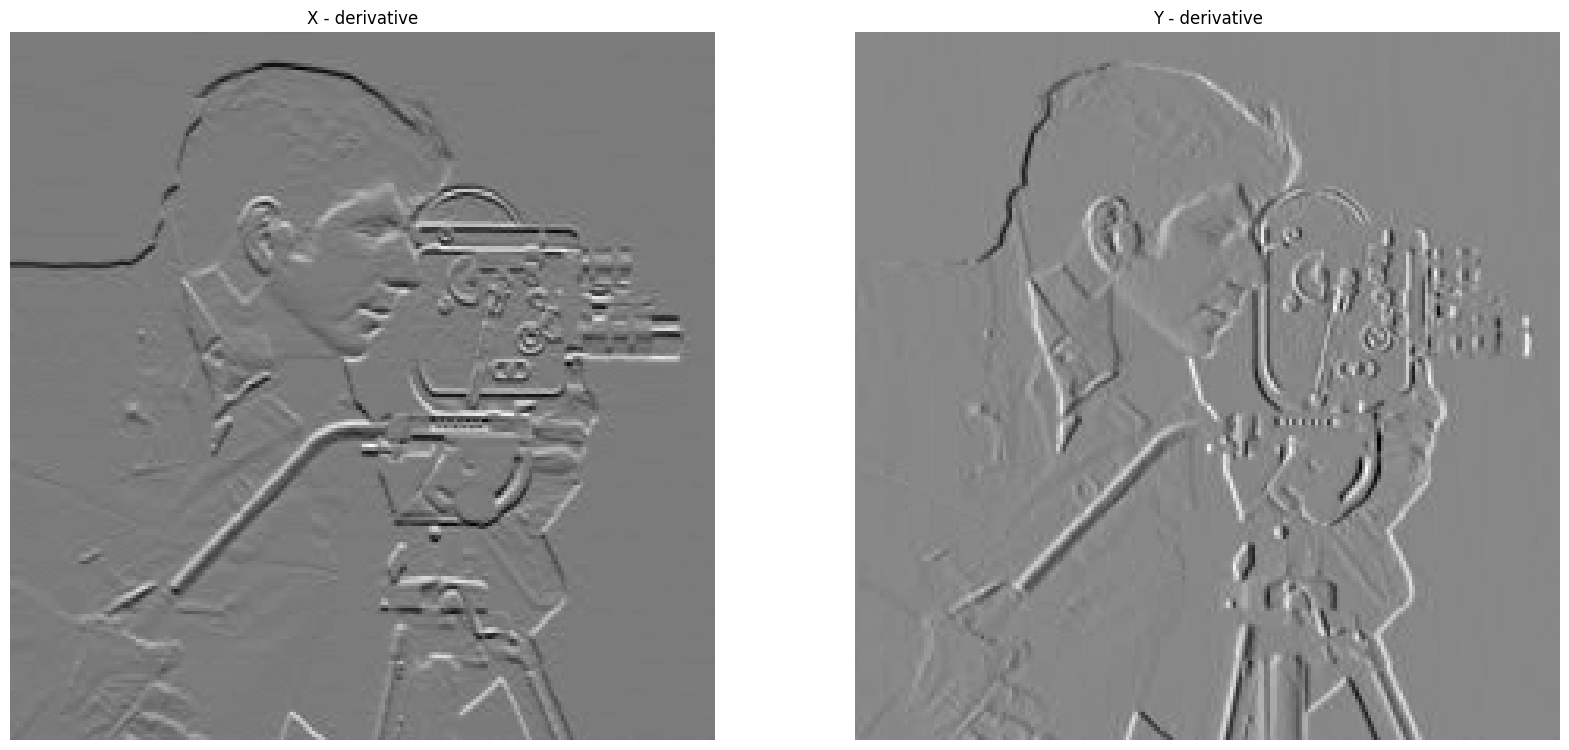

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(Ix, cmap="gray")
plt.title("X - derivative")
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy, cmap="gray")
plt.title("Y - derivative")
plt.axis('off')
plt.show()

In [19]:
gv = np.array([Ix[150,130], Iy[150,130]])
gv

array([-1., -2.])

# Derivative of Gaussian

In [20]:
def Gx(s, sigma):
    # Dimensions of our window
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX

    Gx = np.zeros((s,s))

    for x in range(minX, maxX+1):
        for y in range(minY, maxY+1):
            v = (-x/(2*np.pi*(sigma**4)))*np.exp(-((x**2 + y**2)/(2*(sigma**2))))
            Gx[x-minX, y-minY] = v
    
    return Gx

In [21]:
def Gy(s, sigma):
    # Dimensions of our window
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX

    Gy = np.zeros((s,s))

    for x in range(minX, maxX+1):
        for y in range(minY, maxY+1):
            v = (-y/(2*np.pi*(sigma**4)))*np.exp(-((x**2 + y**2)/(2*(sigma**2))))
            Gy[x-minX, y-minY] = v
    
    return Gy

In [22]:
gx = Gx(3,0.5)
gy = Gy(3,0.5)


In [23]:
img = np.float64(img[:,:,0])

In [24]:
Ix = cv2.filter2D(img, -1, gx)
Iy = cv2.filter2D(img, -1, gy)

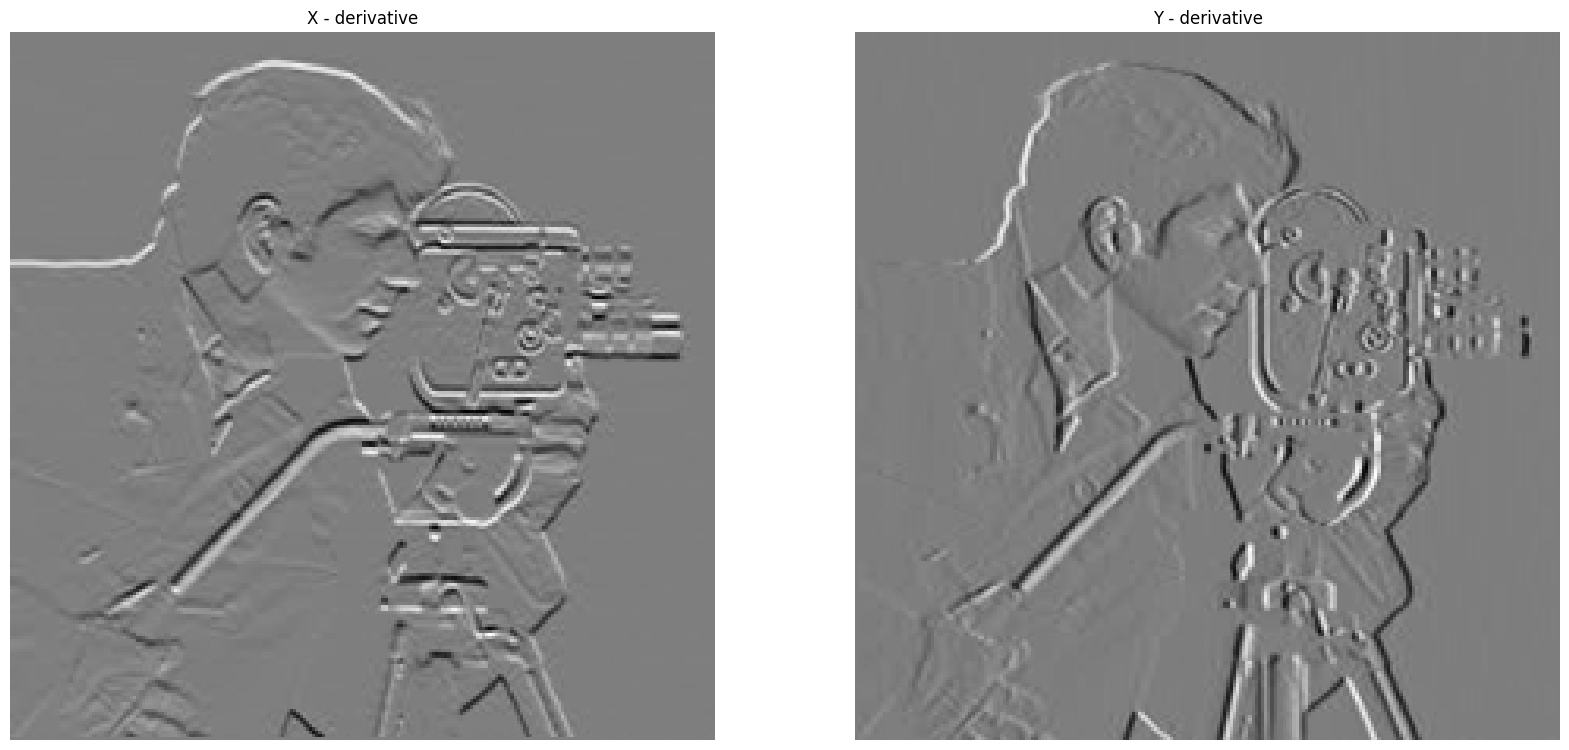

In [25]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(Ix, cmap="gray")
plt.title("X - derivative")
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy, cmap="gray")
plt.title("Y - derivative")
plt.axis('off')
plt.show()

# Gradient Intensity (Gm) and Gradient Direction (Gd)

In [26]:
Gm = (Ix**2 + Iy**2)**0.5
Gd = np.rad2deg(np.arctan2(Iy, Ix))

In [27]:
Gd.min(), Gd.max()

(-180.0, 180.0)

In [28]:
Gd.shape

(225, 224)

In [29]:
Gm.min(), Gm.max()

(0.0, 125.74349298140105)

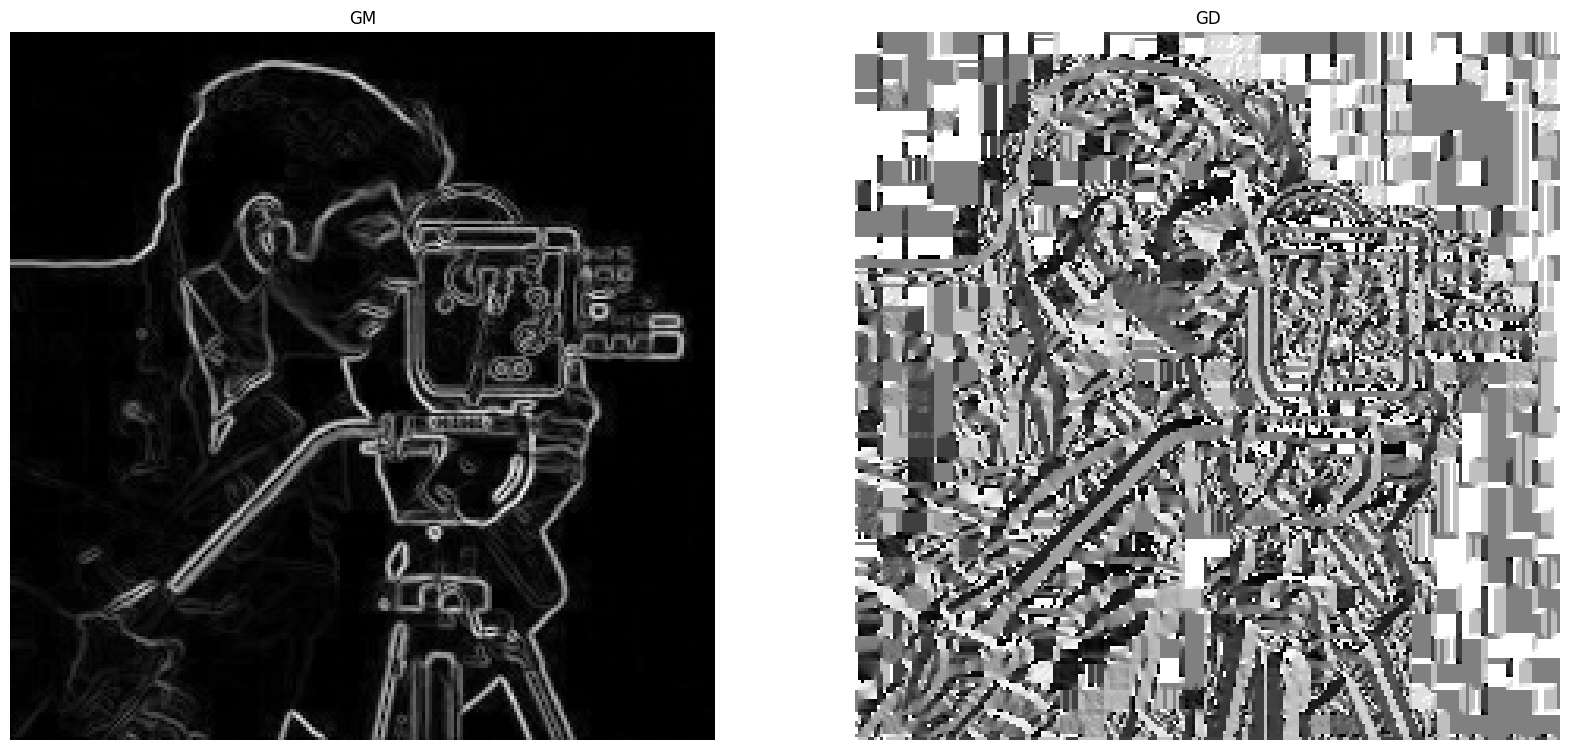

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(Gm, cmap="gray")
plt.title("GM")
plt.axis('off')
plt.subplot(122)
plt.imshow(Gd, cmap="gray")
plt.title("GD")
plt.axis('off')
plt.show()

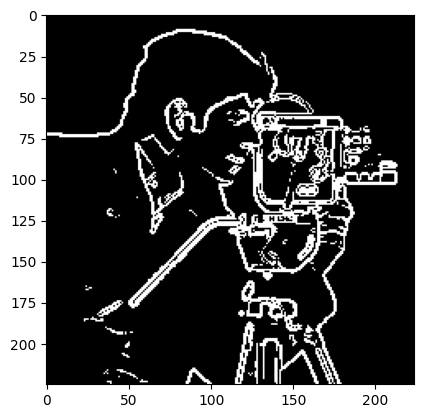

In [31]:
plt.imshow(Gm > 30, cmap="gray")

(array([3342., 3883., 5338., 3533., 3560., 9223., 3602., 6601., 3571.,
        7747.]),
 array([-180., -144., -108.,  -72.,  -36.,    0.,   36.,   72.,  108.,
         144.,  180.]),
 <BarContainer object of 10 artists>)

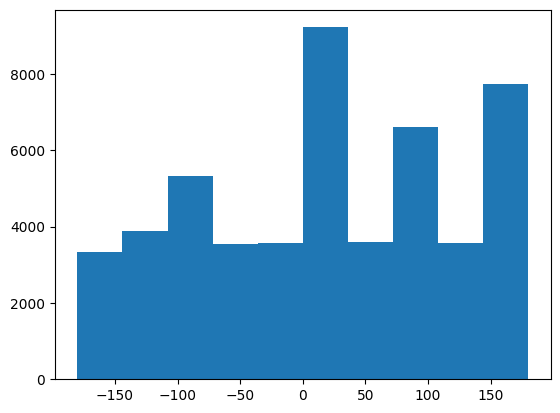

In [32]:
plt.hist(Gd.flatten())

# Gradient Direction Quantization

In [33]:
bins= np.array([-180., -135., -90., -45., 0, 45., 90., 135., 180.])
inds = np.digitize(Gd, bins)-1
Gd_bin = bins[inds.flatten()].reshape(Gd.shape)

In [34]:
i, j= 10,100
Gd[i,j], Gd_bin[i,j]

(-22.008208671455506, -45.0)

`np.digitize` has some trouble getting the correct value. We can use this workaround

In [35]:
Gd_bin = 45*(np.round(Gd/45))
i, j= 12,100
Gd[i,j], Gd_bin[i,j]


(-15.96683566159695, -0.0)

# Non-maxima supression implementation
Takes magnitude matrix and direction matrix

In [36]:
def NMS(Gm, Gd):
    Gd_bin = 45*(np.round(Gd/45))
    Gm_NMS = np.zeros(Gm.shape)
    numRows, numCols = Gm.shape[0], Gm.shape[1]
    a,b = 0., 0.
    for r in range(1, numRows-1):
        for c in range(1, numCols-1):
            ang = Gd_bin[r,c]
            if ang == 180. or ang == -180. or ang == 0.0 or ang == -0.0:
                a,b = Gm[r-1,c], Gm[r+1,c]
            elif ang == 45. or ang == -135.:
                a,b = Gm[r+1,c+1],Gm[r-1,c-1]
            elif ang == 90. or ang == -90.:
                a,b = Gm[r,c-1],Gm[r,c+1]
            elif ang == 135. or ang == -45.:
                a,b = Gm[r-1,c+1],Gm[r+1,c-1]
            else:
                print("Error")
                return
            if Gm[r,c] >= a and Gm[r,c] >= b:
                Gm_NMS[r,c] = Gm[r,c]    
    return Gm_NMS

In [37]:
Gm_NMS = NMS(Gm, Gd)

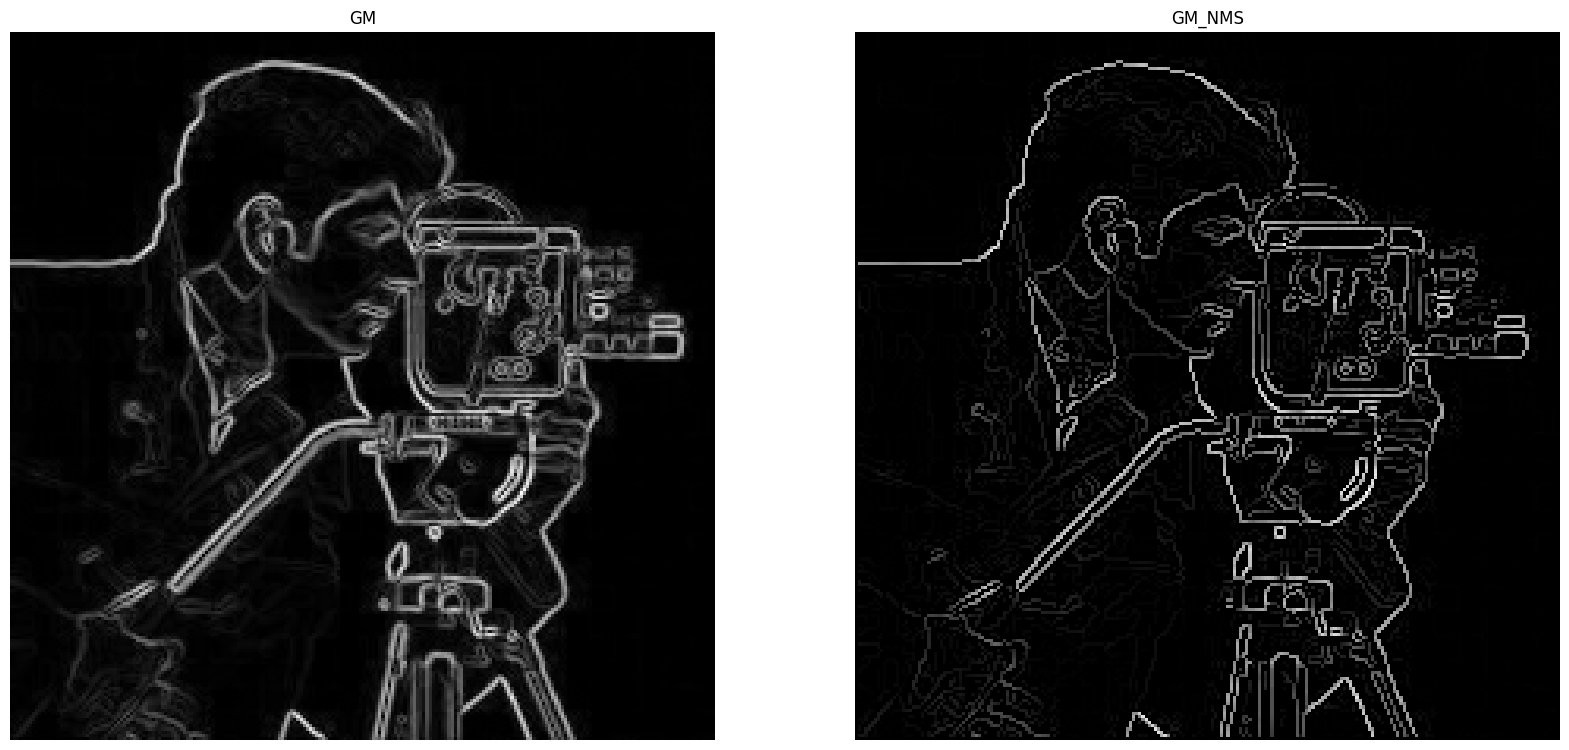

In [38]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(Gm, cmap="gray")
plt.title("GM")
plt.axis('off')
plt.subplot(122)
plt.imshow(Gm_NMS, cmap="gray")
plt.title("GM_NMS")
plt.axis('off')
plt.show()

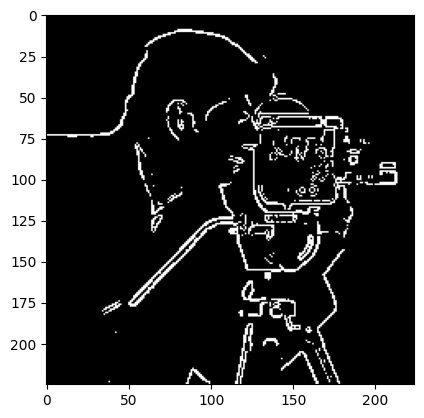

In [39]:
plt.imshow(Gm > 50, cmap="gray")

# Hestheris Thresholding

In [42]:
from skimage import	filters

In [43]:
L = Gm_NMS.mean()
H = L + Gm_NMS.std()
E = filters.apply_hysteresis_threshold(Gm_NMS, L, H)

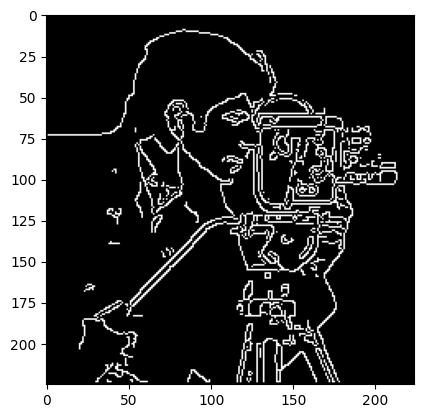

In [44]:
plt.imshow(E, cmap="gray")